In [ ]:
import matplotlib.pyplot as plt
from multiomicscellsim import Simulator
from multiomicscellsim.config import SimulatorConfig, TissueConfig

from multiomicscellsim.torch_cpm.config import TorchCPMConfig, TorchCPMCellType
from multiomicscellsim.patterns.config import RDPatternLibrary

from IPython.display import HTML

size = 256
n_cell_types = 2

# TODOs:
# - Add a distirbution across cell_types across a guideline

# Define some cell types

cell_types = [
    TorchCPMCellType(id=1,
                     name="A",
                     background_adhesion=10.0,
                     cells_adhesion=TorchCPMCellType.build_constant_adhesion_vector(x=10.0, this_id=1, n_types=n_cell_types),
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=4.0,
                     # RDPatternConfig contains f, k, D_a, D_b params)
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Worms')#.add_noise(to=["d_a", "d_b"], var=.01),
    ),
    TorchCPMCellType(id=2,
                     name="B",
                     background_adhesion=10.0,
                     cells_adhesion=TorchCPMCellType.build_constant_adhesion_vector(x=10.0, this_id=2, n_types=n_cell_types),
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=4.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Fingerprints')#.add_noise(to=["d_a", "d_b"], var=.01),
    )
]

# Define the global simulation parameters

sim_config = SimulatorConfig(
    tissue_config = TissueConfig(
        n_curves=2,
        curve_types="circles",
        cell_number_mean = 5,
        cell_number_std = 3,
        cell_type_probabilities = [[.3, .7], [.7, .3]],
        initial_cell_size=7,
    ),
    cpm_config = TorchCPMConfig(
        size=size,
        frontier_probability=0.8,
        temperature=1.0,
        cell_types=cell_types,
        lambda_volume=10.0,
        lambda_perimeter=10.0,
        max_cpm_steps=50,
        run_rd_every=2,
        rd_warmup_steps=10000,
        rd_steps=100,
    ),
    save_tissue_every=5,
    seed=42
)


sim = Simulator(config=sim_config)


INFO:multiomicscellsim.simulator:Setting random seed to 42


[(1052.1156607532737, 295.11526068136135), (1054.3899193008815, 293.507030298129), (1024.913617646814, 262.0021300038701), (1032.7328314596398, 575.2322657354061), (992.8283692262318, 462.30443237204327), (1151.4672909233354, 553.14444822693), (1058.5686133459744, 198.52883916477225)]
[(73, 255), (73, 255), (65, 255), (143, 255), (115, 247), (137, 255), (49, 255)]
[(80.80564636951661, 806.4874062146125), (155.20241043321533, 767.2587266794997), (218.8837811219568, 706.0884612536258), (254.60635317447287, 759.6627012173778), (340.4200343260959, 920.6049401813705), (107.65116948395975, 781.5243774864233), (269.5997837844261, 796.7592616804973), (288.81525624134997, 837.8397035766018), (25.238282764311165, 737.7953459804652), (305.2676004687015, 832.9281448722323)]
[(200, 20), (191, 38), (175, 54), (189, 63), (229, 84), (194, 26), (198, 67), (208, 71), (183, 6), (207, 76)]


100%|██████████| 50/50 [00:09<00:00,  5.33it/s]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


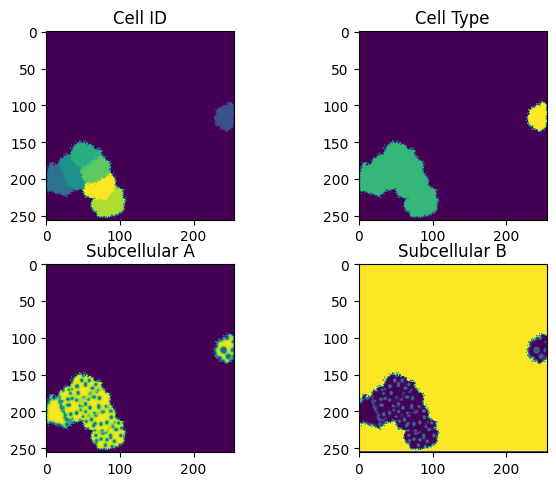

In [2]:
tissues = sim.tissue_generator.sample()
HTML(sim.plot_tissues(tissues))

[(1052.1156607532737, 295.11526068136135), (1054.3899193008815, 293.507030298129), (1024.913617646814, 262.0021300038701), (1032.7328314596398, 575.2322657354061), (992.8283692262318, 462.30443237204327), (1151.4672909233354, 553.14444822693), (1058.5686133459744, 198.52883916477225)]
[(73, 255), (73, 255), (65, 255), (143, 255), (115, 247), (137, 255), (49, 255)]
[(80.80564636951661, 806.4874062146125), (155.20241043321533, 767.2587266794997), (218.8837811219568, 706.0884612536258), (254.60635317447287, 759.6627012173778), (340.4200343260959, 920.6049401813705), (107.65116948395975, 781.5243774864233), (269.5997837844261, 796.7592616804973), (288.81525624134997, 837.8397035766018), (25.238282764311165, 737.7953459804652), (305.2676004687015, 832.9281448722323)]
[(200, 20), (191, 38), (175, 54), (189, 63), (229, 84), (194, 26), (198, 67), (208, 71), (183, 6), (207, 76)]


100%|██████████| 50/50 [00:08<00:00,  5.74it/s]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


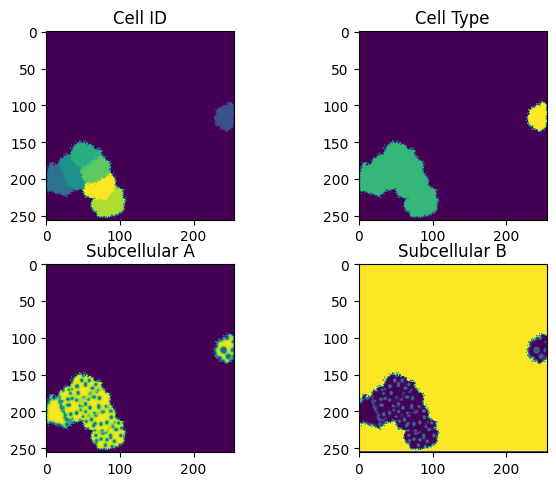

In [2]:
tissues = sim.tissue_generator.sample()
HTML(sim.plot_tissues(tissues))

In [80]:
x, y = 30, 200
s = 5
tissues[-1].cell_grid[0, y-s:y+s, x-s:x+s]

tensor([[3, 3, 3, 3, 3, 1, 1, 3, 3, 1],
        [3, 3, 3, 3, 3, 3, 3, 3, 1, 1],
        [3, 3, 3, 3, 1, 1, 1, 3, 1, 1],
        [3, 3, 3, 3, 3, 3, 1, 1, 1, 1],
        [3, 3, 3, 3, 3, 3, 1, 1, 1, 1],
        [3, 3, 3, 3, 3, 1, 3, 3, 1, 1],
        [3, 3, 3, 3, 3, 3, 3, 1, 1, 1],
        [3, 3, 3, 3, 3, 1, 1, 3, 1, 1],
        [3, 3, 3, 3, 1, 3, 1, 1, 1, 1],
        [3, 3, 3, 3, 3, 3, 1, 1, 1, 1]], dtype=torch.int32)

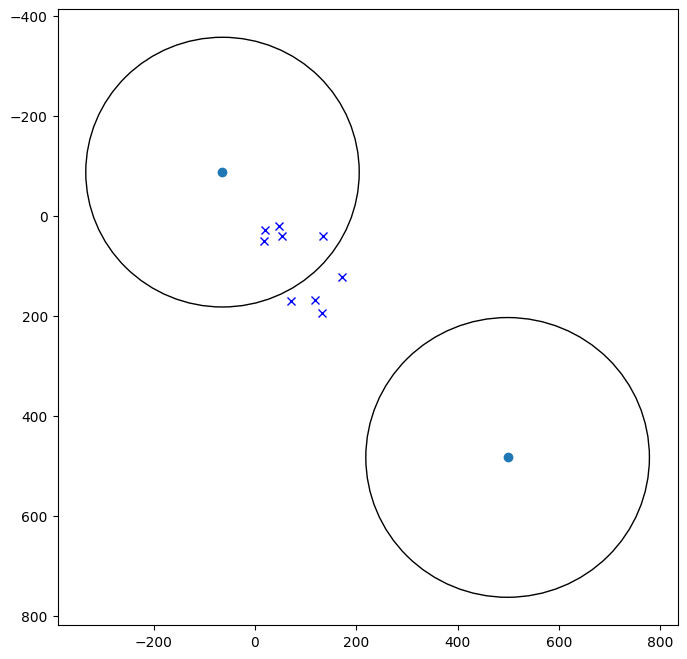

In [13]:
from matplotlib import patches
from multiomicscellsim.entities import Tissue

def plot_debug(tissue: Tissue, size: int = 8):
        fig, ax = plt.subplots(1, 1, figsize=(size, size))

        # Plotting guidelines
        # Plotting centers
        x_centers = [gl.x_center for gl in tissue.guidelines]
        y_centers = [gl.y_center for gl in tissue.guidelines]
        radii = [gl.radius for gl in tissue.guidelines]
        plt.scatter(x=x_centers, y=y_centers)
        # Plotting guidelines
        for x, y, r in zip(x_centers, y_centers, radii):
            circle = patches.Circle(xy=[x, y], radius=r, fill=False)
            ax.add_patch(circle)

        # Plotting cells
        for cell in tissue.cells:
            x, y = cell.start_coordinates
            # Plot cell position as an "X"
            ax.plot(x, y, 'x', color='blue')

        plt.gca().invert_yaxis()
        plt.show()

plot_debug(tissues[0])

In [14]:
tissues[0].guidelines

[Guideline(type='circle', x_center=498.58663364278243, y_center=483.0132584344493, radius=279.7454709236247, radial_std=50.0, n_cells=5, tangent_distribution='uniform', radial_distribution='normal'),
 Guideline(type='circle', x_center=-63.89176740492494, y_center=-87.59874540086847, radius=269.7217807820748, radial_std=50.0, n_cells=6, tangent_distribution='uniform', radial_distribution='normal')]

In [15]:
tissues[0].cells

[Cell(cell_id=1, start_coordinates=[172.0, 122.0], cell_type=TorchCPMCellType(id=2, name='B', background_adhesion=10.0, cells_adhesion=tensor([10.,  0.]), preferred_volume=13107, preferred_local_perimeter=4, subcellular_pattern=RDPatternConfig(pattern_name='Fingerprints', d_a=0.2097, d_b=0.105, f=0.037, k=0.06))),
 Cell(cell_id=2, start_coordinates=[72.0, 170.0], cell_type=TorchCPMCellType(id=2, name='B', background_adhesion=10.0, cells_adhesion=tensor([10.,  0.]), preferred_volume=13107, preferred_local_perimeter=4, subcellular_pattern=RDPatternConfig(pattern_name='Fingerprints', d_a=0.2097, d_b=0.105, f=0.037, k=0.06))),
 Cell(cell_id=3, start_coordinates=[118.0, 169.0], cell_type=TorchCPMCellType(id=2, name='B', background_adhesion=10.0, cells_adhesion=tensor([10.,  0.]), preferred_volume=13107, preferred_local_perimeter=4, subcellular_pattern=RDPatternConfig(pattern_name='Fingerprints', d_a=0.2097, d_b=0.105, f=0.037, k=0.06))),
 Cell(cell_id=4, start_coordinates=[134.0, 41.0], cel

In [ ]:

def plot_guideline(g, ax):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    # Setup axes in microscopy space
    #ax.invert_yaxis()
    ax.set_xlim(0, self.microscopy_config.coord_max)
    ax.set_ylim(0, self.microscopy_config.coord_max)
    
    # Plotting guidelines
    # Plotting centers
    x_centers = [gl.x_center for gl in tissue.guidelines]
    y_centers = [gl.y_center for gl in tissue.guidelines]
    radii = [gl.radius for gl in tissue.guidelines]
    plt.scatter(x=x_centers, y=y_centers)
    # Plotting guidelines
    for x, y, r in zip(x_centers, y_centers, radii):
        circle = patches.Circle(xy=[x, y], radius=r, fill=False)
        ax.add_patch(circle)
        max_circle = patches.Circle(xy=[x, y], radius=self.tissue_config.max_radius_perc*self.microscopy_config.coord_max, fill=False, linestyle="dashed", edgecolor="red")
        ax.add_patch(max_circle)
        min_circle = patches.Circle(xy=[x, y], radius=self.tissue_config.min_radius_perc*self.microscopy_config.coord_max, fill=False, linestyle="dashed", edgecolor="green")
        ax.add_patch(min_circle)

In [1]:
import random
from multiomicscellsim.utils.commons import seed_everything
import torch
from torch.random import 

seed_everything()
for k in range(10):
    print(random.random())
    print(torch.random.)

0.6394267984578837
0.025010755222666936
0.27502931836911926
0.22321073814882275
0.7364712141640124
0.6766994874229113
0.8921795677048454
0.08693883262941615
0.4219218196852704
0.029797219438070344
